In [1]:
import warnings
warnings.filterwarnings('ignore')

# Módulo 4 - Projeto 1: *support vector machines*

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Alana Santana -- alana.correia@ic.unicamp.br
           Hudson Bruno -- hudson.bruno@ic.unicamp.br

Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina: 
[moodle.lab.ic.unicamp.br/456](https://moodle.lab.ic.unicamp.br/moodle/course/view.php?id=456)

Instituto de Computação - Unicamp 2021

In [2]:
from __future__ import print_function

from math import ceil
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

import seaborn as sns

from IPython.display import display

In [3]:
np.random.seed(1082141)
sns.set()

## Classificando imagens de dígitos
### Lendo o conjunto de dados

**Pen-Based Recognition of Handwritten Digits Data Set**
é um banco de imagens simples e bem conhecido em reconhecimento de imagens.  
Ele é composto por imagens em escala cinza de 8 por 8 pixels divididas em 10 classes de dígitos.

Uma descrição completa pode ser encontrada no seguinte link: [archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)

In [4]:
x, y = datasets.load_digits(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.5,
                                                    random_state=183212)
print('amostras em treino: %i' % x_train.shape[0],
      'amostras em teste: %i' % x_test.shape[0],
      'número de características: %i' % x_train.shape[1],
      'número de classes: %i' % (np.max(y_train) + 1),
      sep='\n', end='\n\n')

amostras em treino: 898
amostras em teste: 899
número de características: 64
número de classes: 10



### 64 primeiras amostras no conjunto de treinamento

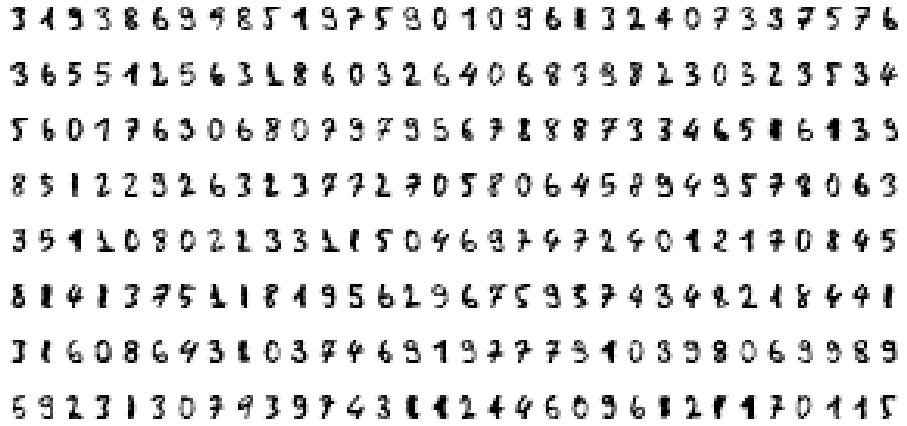

In [5]:
plt.figure(figsize=(16, 8))

for ix in range(8  * 32):
    plt.subplot(8, 32, ix + 1)
    plt.imshow(x_train[ix].reshape(8, 8), cmap='Greys')
    plt.axis('off')

### Visualizando o conjunto e frequências das classes

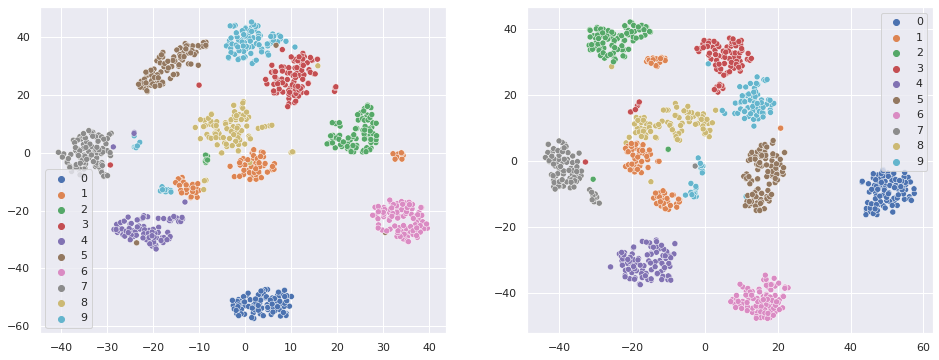

In [6]:
from sklearn.manifold import TSNE

encoder2D = TSNE()
w_train = encoder2D.fit_transform(x_train)
w_test = encoder2D.fit_transform(x_test)

plt.figure(figsize=(16, 6))
categorical_colors = sns.color_palette()

for ix, (x, y) in enumerate(((w_train, y_train), (w_test, y_test))):
    plt.subplot(1, 2, ix + 1)
    sns.scatterplot(*x.T, hue=y, palette=categorical_colors);

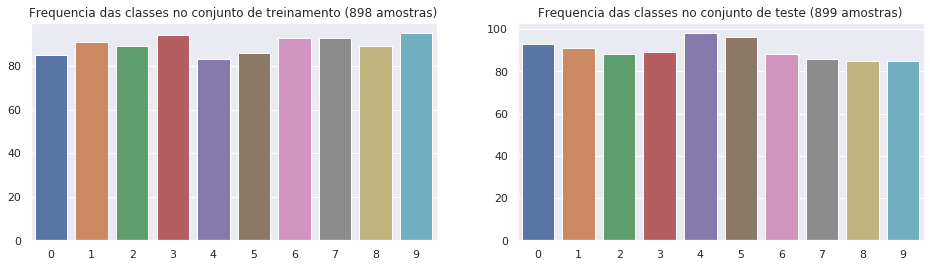

In [7]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('Frequencia das classes no conjunto de treinamento (%i amostras)' % len(x_train))
labels, counts = np.unique(y_train, return_counts=True)
sns.barplot(labels, counts)

plt.subplot(122)
plt.title('Frequencia das classes no conjunto de teste (%i amostras)' % len(x_test))
labels, counts = np.unique(y_test, return_counts=True)
sns.barplot(labels, counts);

### Modelando um classificador de digitos

**Atividade (3 pts):** defina e treine uma máquina de vetor de suporte com diferentes tipos de kernel, utilizando o scikit-learn. Avalie os diversos tipos de kernel e seus respectivos parâmetros com relação a qualidade da solução. Você deve separar uma parte do conjunto de treino para fazer a validação cruzada. Não utilize o conjunto de teste ainda.

In [8]:
from sklearn import svm

In [9]:
#determinado a validação cruzada em relação ao conjunto de treino
# 70% para treino e os 30%  para validação
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3,)
print('Dados para o Treino', x_train.shape)
print('Dados para a Validação:', x_val.shape)

Dados para o Treino (628, 64)
Dados para a Validação: (270, 64)


#### Analisando a SVM com diferentes tipos de Kernels

In [10]:
from sklearn.metrics import classification_report

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

def getSVM(k):
    if k == 0:
        # Polynomial kernal
        return svm.SVC(kernel='poly', degree=8, gamma="auto")
    elif k == 1:
        # Radial Basis Function kernal
        return svm.SVC(kernel='rbf', gamma="scale")
    elif k == 2:
        # Sigmoid kernal
        return svm.SVC(kernel='sigmoid', gamma="scale")
    elif k == 3:
        # Linear kernal
        return svm.SVC(kernel='linear')

Treinando as SVMs criadas e utilizando o conjunto de validação para realizar a avaliação dos modelos. Foram criadas 4 SVMs com os kernels: Polynomial, RBF, Sigmoid e Linear.

In [11]:
for i in range(4):
    svm_c = getSVM(i) 
    svm_c.fit(x_train, y_train)
    y_pred = svm_c.predict(x_val)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_val,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.96      0.93      0.95        28
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00        27
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        23
           6       0.97      1.00      0.98        32
           7       1.00      1.00      1.00        26
           8       0.97      0.94      0.95        31
           9       1.00      1.00      1.00        29

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      1.00      0.98        28
           2       1.00  

O hiperparametro que foi modificado foi o valor de Gamma, sendo testados os valores scale e auto para todos os tipos de kernels. Os melhores resultados foram: Gamma auto para o Kernel polinomial e Gamma scale para Sigmoid e RBF. O Kernel linear não foi utilizado esse parâmetros. 

* Scale: 1 / (n_features * X.var()) 
* Auto: 1 / n_features


Com base nas SVMs criadas a que obteve o melhor resultado foi o kernel RBF.

In [12]:
svm_rbf = svm.SVC(kernel='rbf', gamma="scale")
svm_rbf.fit(x_train, y_train)

SVC()

#### Processo de Treinamento

### Definindo funções úteis para o cálculo das métricas de avaliação dos modelos

In [13]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [14]:
#função para o plot da matriz de confusão
def plot_matriz_confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in "ABCDEFGHIJ"], columns = [i for i in "ABCDEFGHIJ"])
    plt.figure(figsize = (8,8))
    sns.heatmap(df_cm, annot=True,cmap="OrRd")

In [15]:
#função auxiliar para o calculo da acurácia médica
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

In [16]:
#função para plot da ROC Multiclass
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Avaliando o modelo treinado

**Atividade (2 pts):** avalie o seu melhor modelo treinado no item anterior sobre o conjunto de teste previamente separado. Reporte a acurácia média, a matriz de confusão e outras métricas que achar válido.

**Métricas calculadas com base no conjunto de teste**

Calculando a acurácia média e a global

In [17]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

In [18]:
y_pred = svm_rbf.predict(x_test)

In [19]:
print('A acurácia global com base no conjunto de teste: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

A acurácia global com base no conjunto de teste: 0.9833


In [20]:
from sklearn.model_selection import cross_val_score

results_rbf = cross_val_score(svm_rbf, x_train, y_train, cv = 5, scoring = 'accuracy')
   
intervalo(results_rbf)

Acurácia média: 96.82%
Intervalo de acurácia: [93.80% ~ 99.83%]


Gráfico com a curva roc do Modelo SVM RBF


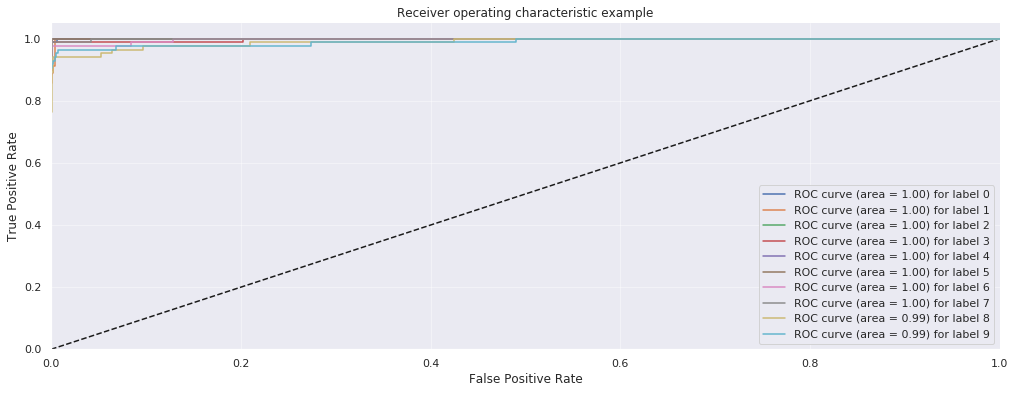

In [21]:
print("Gráfico com a curva roc do Modelo SVM RBF")

plot_multiclass_roc(svm_rbf, x_test, y_test, 10)

Plotando a Matriz de Confusão

Matriz de confusão para o SVM com Kernel RBF e Gamma Scale


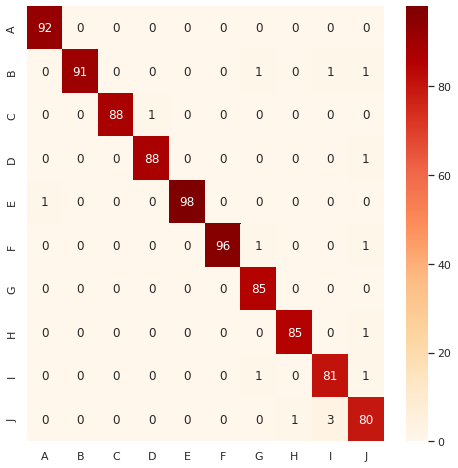

In [22]:
print("Matriz de confusão para o SVM com Kernel RBF e Gamma Scale")
plot_matriz_confusion(y_pred, y_test)

**Atividade (4 pts):** treine dois ou mais classificadores (Random forest, logistic regression, etc.) e reporte o suas respectivas métricas sobre as porções de validação separadas (acurácia, acurácia balanceada, precision, etc). Compare seus melhores classificadores com os resultados da SVM no conjunto de teste. 



**Treinando uma rede neural MLP**

In [23]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

In [24]:
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [37]:
pred_mlp = mlp.predict(x_test)

In [38]:
print('A acurácia global com base no conjunto de teste: {0:0.4f}'.format(accuracy_score(y_test, pred_mlp)))

A acurácia global com base no conjunto de teste: 0.8287


In [40]:
print('A acurácia balanceada com base no conjunto de teste: {0:0.4f}'.format(balanced_accuracy_score(y_test, pred_mlp)))

A acurácia balanceada com base no conjunto de teste: 0.8282


In [41]:
results_mlp = cross_val_score(mlp, x_train, y_train, cv = 5, scoring = 'accuracy')
   
intervalo(results_mlp)

Acurácia média: 83.28%
Intervalo de acurácia: [76.12% ~ 90.45%]


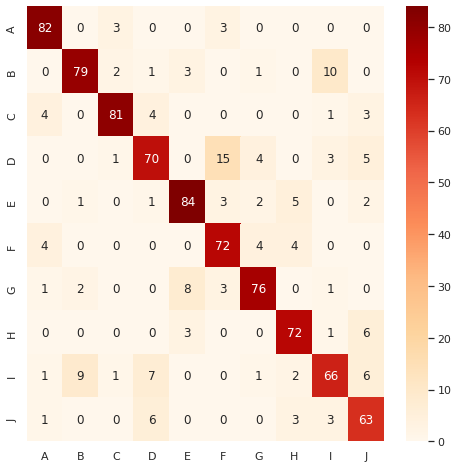

In [44]:
plot_matriz_confusion(pred_mlp, y_test)

In [49]:
print(classification_report(y_test, pred_mlp))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        93
           1       0.82      0.87      0.84        91
           2       0.87      0.92      0.90        88
           3       0.71      0.79      0.75        89
           4       0.86      0.86      0.86        98
           5       0.86      0.75      0.80        96
           6       0.84      0.86      0.85        88
           7       0.88      0.84      0.86        86
           8       0.71      0.78      0.74        85
           9       0.83      0.74      0.78        85

    accuracy                           0.83       899
   macro avg       0.83      0.83      0.83       899
weighted avg       0.83      0.83      0.83       899



**Treinando um classificador Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 50, max_depth=6)

In [28]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=50,
                       random_state=42)

In [29]:
y_pred_rfc=rfc.predict(x_test)

In [51]:
print('A acurácia global com base no conjunto de teste: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

A acurácia global com base no conjunto de teste: 0.9466


In [55]:
print('A acurácia balanceada com base no conjunto de teste: {0:0.4f}'.format(balanced_accuracy_score(y_test, y_pred_rfc)))

A acurácia balanceada com base no conjunto de teste: 0.9460


In [52]:
results_rfc = cross_val_score(rfc, x_train, y_train, cv = 5, scoring = 'accuracy')
   
intervalo(results_rfc)

Acurácia média: 93.47%
Intervalo de acurácia: [91.15% ~ 95.80%]


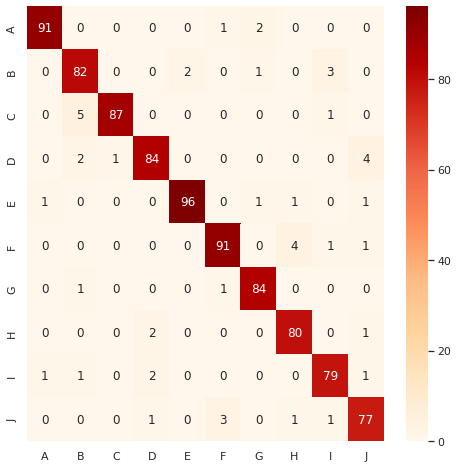

In [53]:
plot_matriz_confusion(y_pred_rfc, y_test)

**Treinando um classificador Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

In [32]:
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [33]:
lr_pred_y = lr.predict(x_test)

In [34]:
print('Acurácia global do classificador logistic regression: {:.4f}'.format(lr.score(x_test, y_test)))

Acurácia do classificador logistic regression: 0.9310


In [56]:
results_lr = cross_val_score(lr, x_train, y_train, cv = 5, scoring = 'accuracy')
   
intervalo(results_lr)

Acurácia média: 92.84%
Intervalo de acurácia: [88.47% ~ 97.20%]


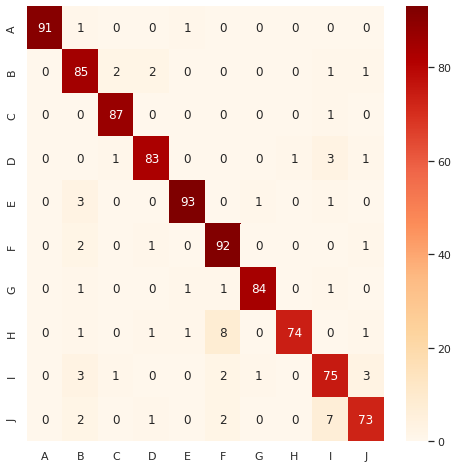

In [35]:
plot_matriz_confusion(y_test, lr_pred_y)

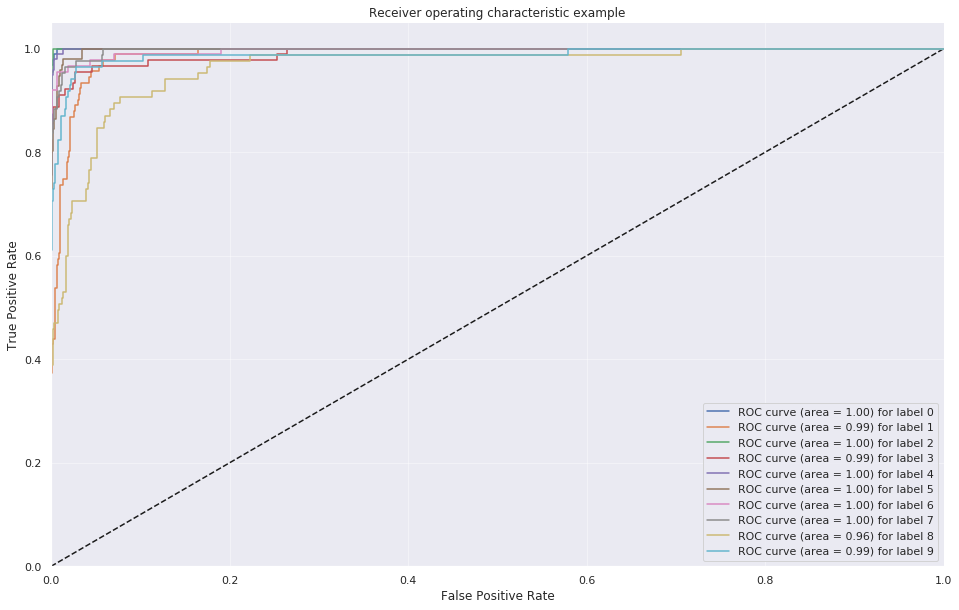

In [36]:
plot_multiclass_roc(lr, x_test, y_test, n_classes=10, figsize=(16, 10))

**Pergunta (1pt):** qual classificador apresentou os melhores resultados? Qual critério você utilizou para definir sua escolha? Discuta.